In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# importing the dataset using dask

data = pd.read_csv('/content/onlinefraud.csv')

print(data.shape)

(1387874, 11)


In [ ]:
data.sample(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
711565,37,CASH_OUT,28720.76,C2062832097,21725.00,0.00,C339602591,1553068.21,1581788.96,0.0,0.0
174943,12,PAYMENT,297.36,C15457412,0.00,0.00,M1341888441,0.00,0.00,0.0,0.0
459477,19,PAYMENT,9251.00,C535660424,206592.20,197341.20,M1034894587,0.00,0.00,0.0,0.0
1312048,136,PAYMENT,6031.92,C1627134174,41439.00,35407.08,M745843115,0.00,0.00,0.0,0.0
290531,15,PAYMENT,13346.94,C301805868,114972.23,101625.29,M433107802,0.00,0.00,0.0,0.0
55107,9,PAYMENT,1860.62,C2009731896,1058303.23,1056442.61,M677391817,0.00,0.00,0.0,0.0
487947,19,CASH_OUT,123395.46,C285555035,133452.00,10056.54,C557592062,202654.64,591550.99,0.0,0.0
239866,14,CASH_OUT,83793.62,C837917038,21496.00,0.00,C485164977,0.00,83793.62,0.0,0.0
628608,34,CASH_OUT,227900.74,C1290202971,0.00,0.00,C1133607239,1849904.60,2077805.34,0.0,0.0
797096,40,PAYMENT,2328.84,C588085699,22123.00,19794.16,M860254927,0.00,0.00,0.0,0.0


In [ ]:
# getting the information related to data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1387874 entries, 0 to 1387873
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1387874 non-null  int64  
 1   type            1387874 non-null  object 
 2   amount          1387874 non-null  float64
 3   nameOrig        1387874 non-null  object 
 4   oldbalanceOrg   1387874 non-null  float64
 5   newbalanceOrig  1387874 non-null  float64
 6   nameDest        1387874 non-null  object 
 7   oldbalanceDest  1387874 non-null  float64
 8   newbalanceDest  1387874 non-null  float64
 9   isFraud         1387873 non-null  float64
 10  isFlaggedFraud  1387873 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 116.5+ MB


In [ ]:
#describing the data

data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.387874e+06,1.387874e+06,1.387874e+06,1.387874e+06,1.387874e+06,1.387874e+06,1.387873e+06,1387873.0
mean,5.261857e+01,1.627251e+05,8.737655e+05,8.945704e+05,9.901607e+05,1.119479e+06,1.132668e-03,0.0
std,4.724415e+01,2.703034e+05,2.965599e+06,3.001967e+06,2.305943e+06,2.413709e+06,3.363609e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.600000e+01,1.315986e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,3.600000e+01,7.935446e+04,1.540306e+04,0.000000e+00,1.335925e+05,2.273013e+05,0.000000e+00,0.0
75%,9.400000e+01,2.189144e+05,1.289467e+05,1.709548e+05,9.364506e+05,1.159371e+06,0.000000e+00,0.0
max,1.390000e+02,1.000000e+07,3.893942e+07,3.894623e+07,4.220740e+07,4.220740e+07,1.000000e+00,0.0


In [ ]:
#checking how many frauds are there

data['isFraud'].value_counts()

,count
isFraud,
0.0,1386301
1.0,1572


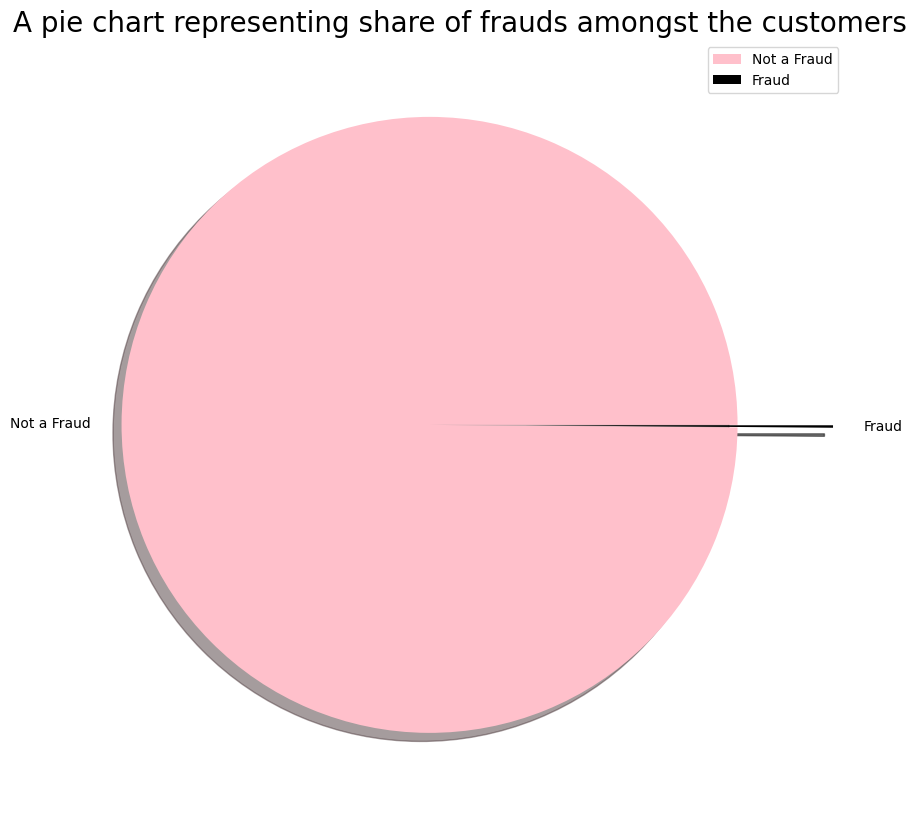

In [ ]:
labels = ['Not a Fraud', 'Fraud']
colors = ['pink', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [ ]:
data['isFlaggedFraud'].value_counts()

,count
isFlaggedFraud,
0.0,1387873


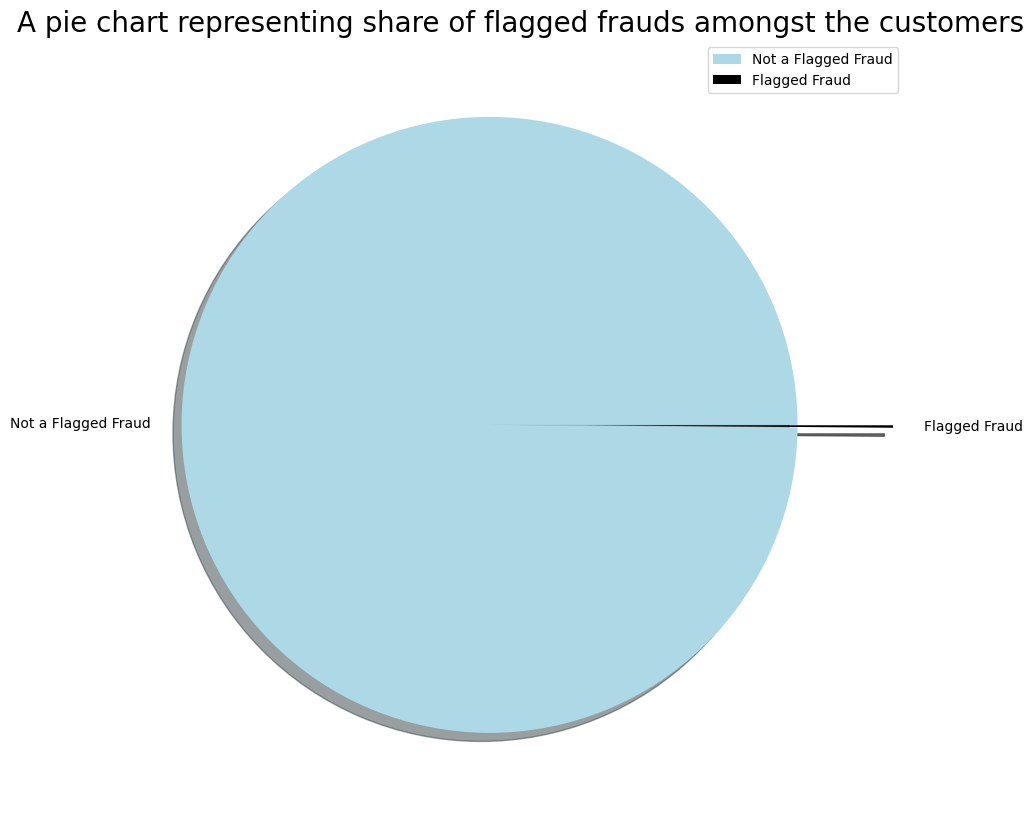

In [ ]:
labels = ['Not a Flagged Fraud', 'Flagged Fraud']
colors = ['lightblue', 'black']
size = [6354407, 8213]
explode = [0.1, 0.21]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, labels = labels, colors = colors, explode = explode, shadow = True)
plt.axis('off')
plt.title('A pie chart representing share of flagged frauds amongst the customers',fontsize = 20)
plt.legend()
plt.show()

In [ ]:
data['type'].value_counts()

,count
type,
CASH_OUT,496025
PAYMENT,463260
CASH_IN,304315
TRANSFER,115115
DEBIT,9159


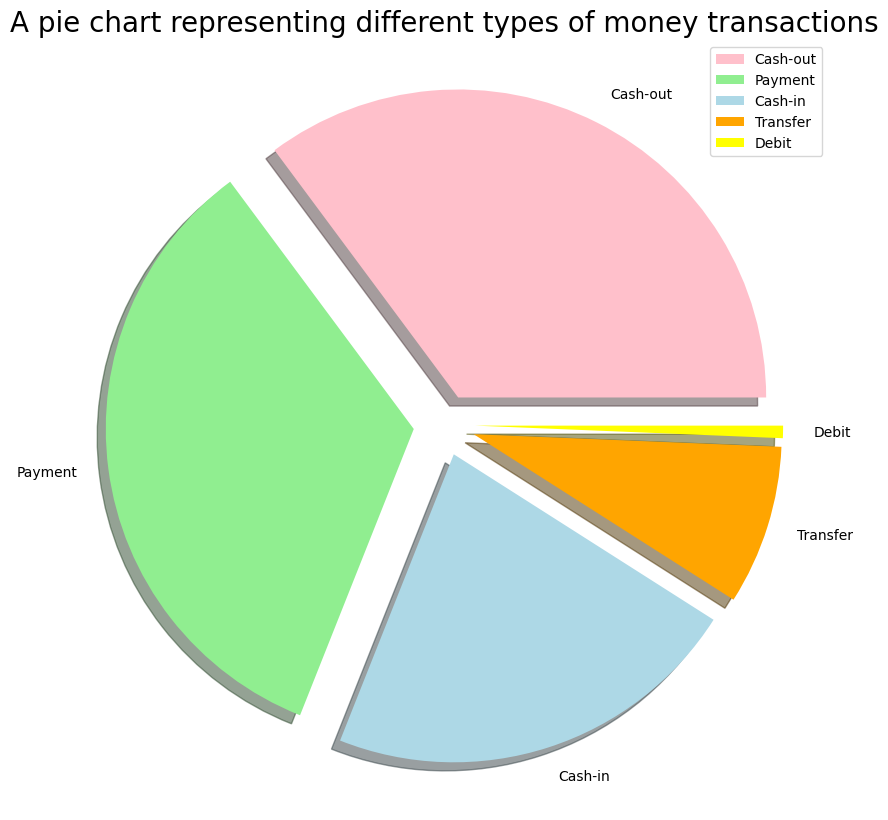

In [ ]:
labels = ['Cash-out', 'Payment', 'Cash-in', 'Transfer', 'Debit']
size = [2237500, 2151495, 1399284, 532909, 41432]
colors = ['pink', 'lightgreen', 'lightblue', 'orange', 'yellow']
explode = [0.1, 0.1, 0.1, 0.1, 0.1]

plt.rcParams['figure.figsize'] = (10, 10)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True)
plt.title('A pie chart representing different types of money transactions', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()

In [ ]:
# checking the different types of steps involved in transactions

x = data['step'].value_counts().nunique()

# printing the result
print("The no. of different steps involved in transactions are :", x)

The no. of different steps involved in transactions are : 77


<ipython-input-14-f827899b7a57>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.step, fit = norm, kde = False)


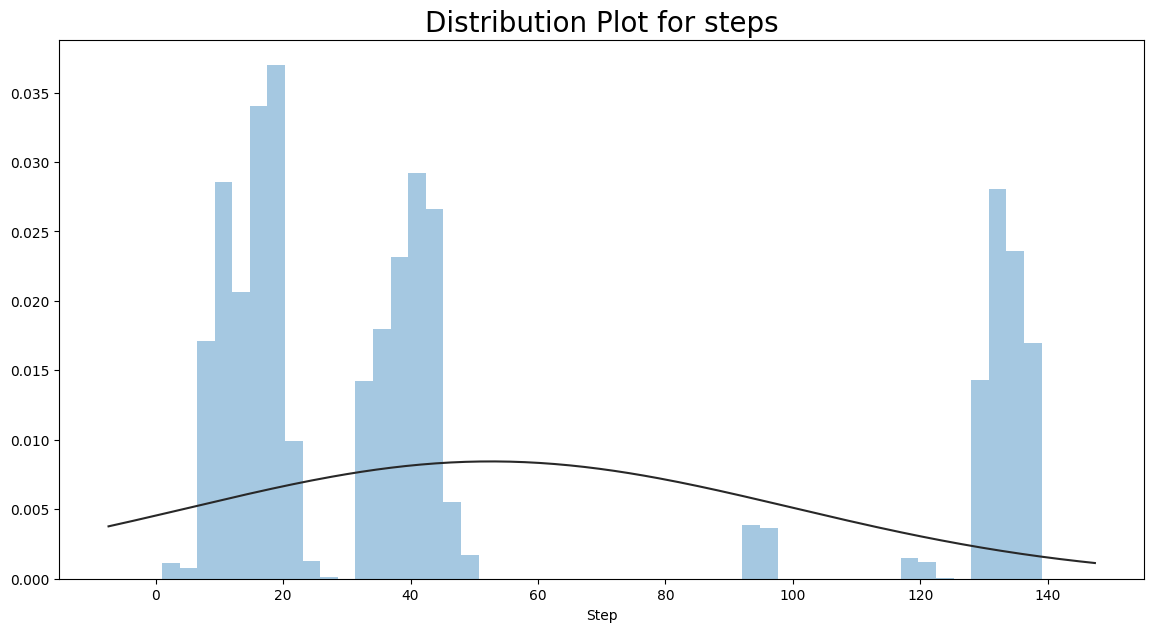

In [ ]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# importing norm
from scipy.stats import norm

sns.distplot(data.step, fit = norm, kde = False)
plt.title('Distribution Plot for steps', fontsize = 20)
plt.xlabel('Step', fontsize = 10)
plt.show()

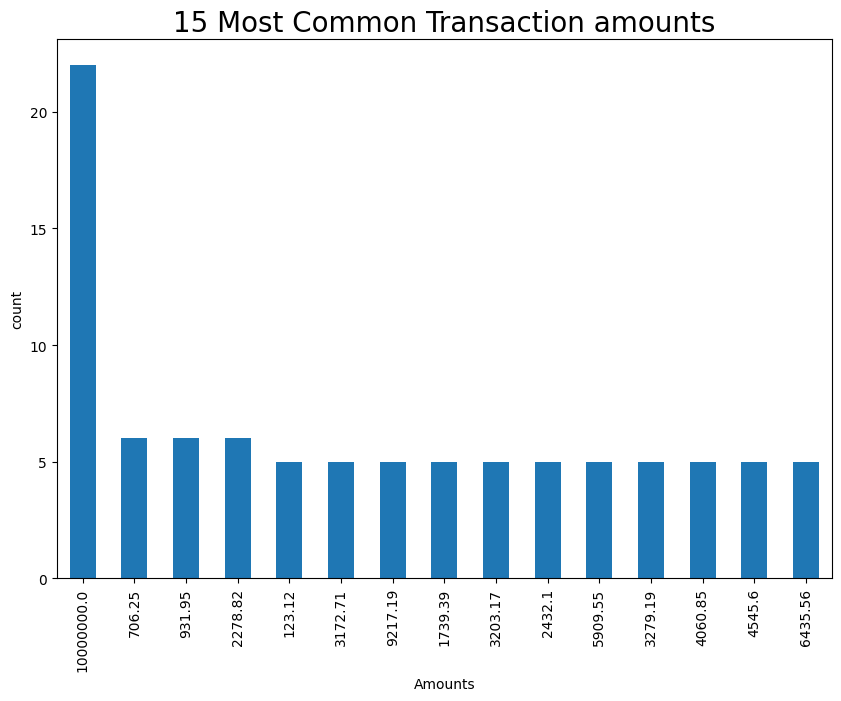

In [ ]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (10, 7)

data['amount'].value_counts().head(15).plot.bar()
plt.title('15 Most Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

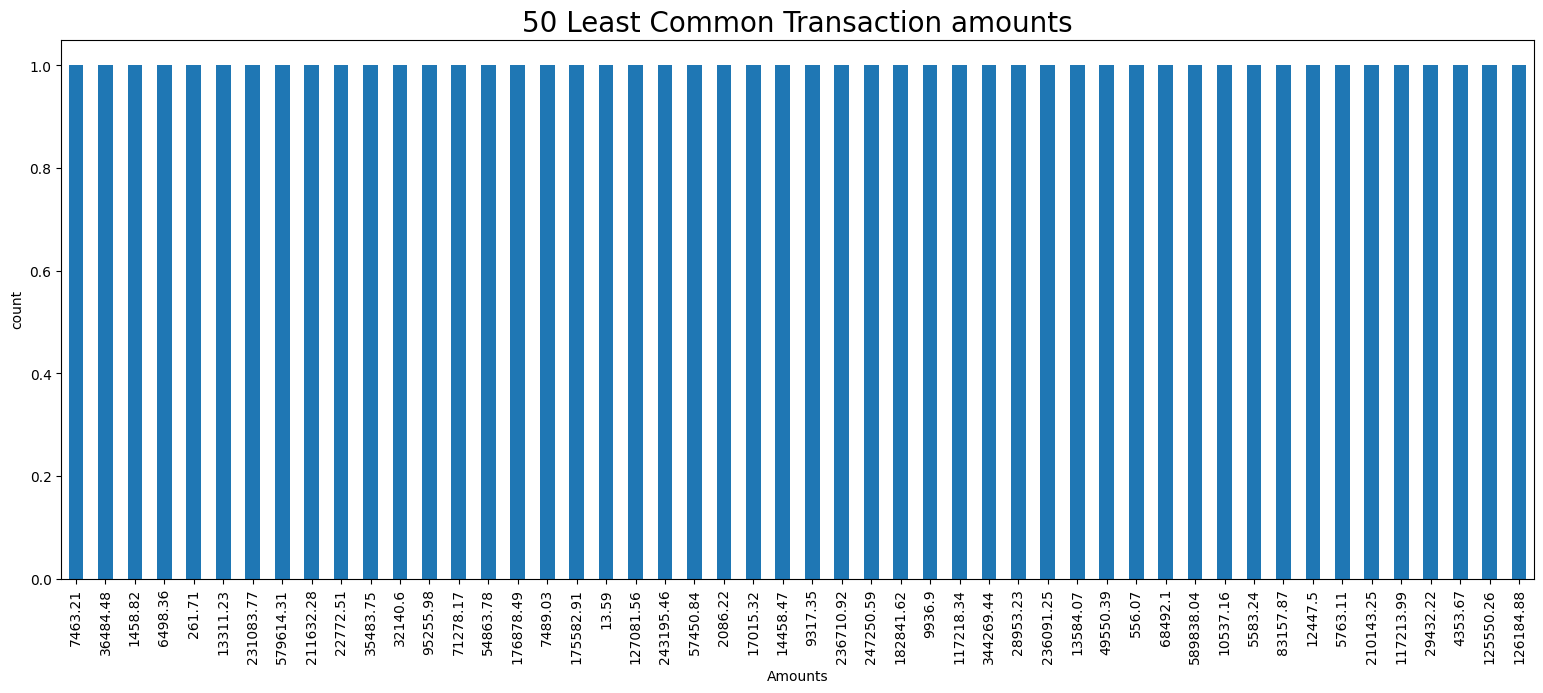

In [ ]:
# checking the different values of amounts transationed

plt.rcParams['figure.figsize'] = (19, 7)

data['amount'].value_counts().tail(50).plot.bar()
plt.title('50 Least Common Transaction amounts', fontsize = 20)
plt.xlabel('Amounts')
plt.ylabel('count')
plt.show()

<ipython-input-17-8ee55beaaa83>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data.amount)


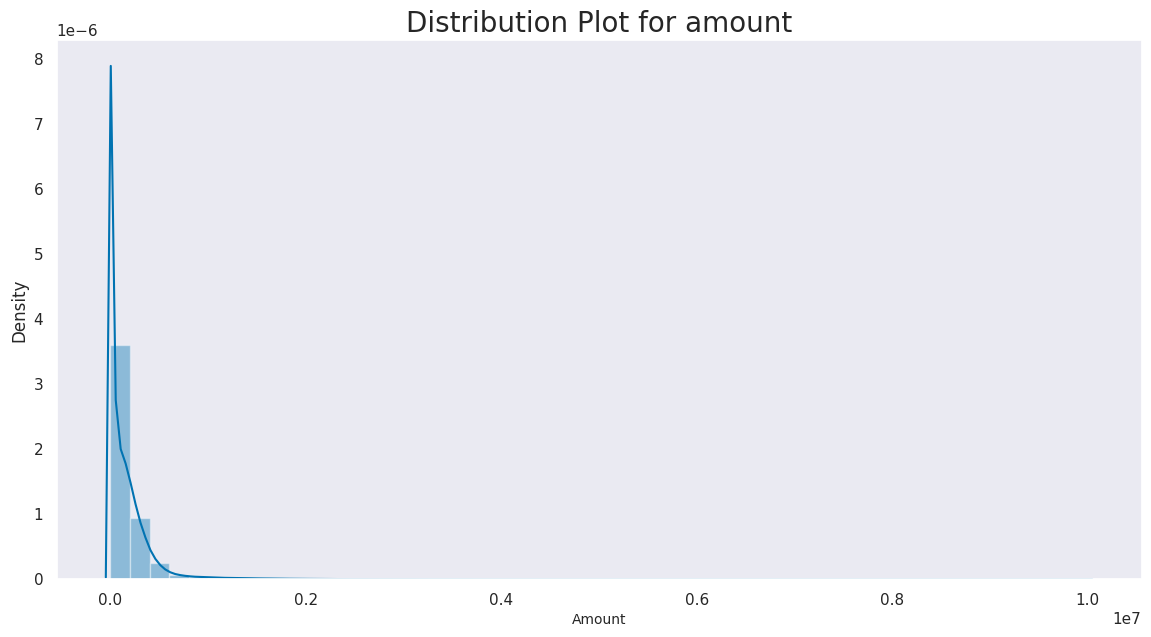

In [ ]:
# setting thesze of the figure
plt.rcParams['figure.figsize'] =(14, 7)

# setting the style in seaborn
sns.set(style = 'dark', palette = 'colorblind')

#plotting a dist plot
ax = sns.distplot(data.amount)
ax.set_title(label = 'Distribution Plot for amount', fontsize = 20)
ax.set_xlabel(xlabel = 'Amount', fontsize = 10)
plt.show()

In [ ]:
# finding  out the types of fraudulent transaction types out of all the transaction modes.

print('The Types of fraudulent transactions are {}'.format(list(data.loc[data.isFraud == 1].type.drop_duplicates().values)) )

The Types of fraudulent transactions are ['TRANSFER', 'CASH_OUT']


In [ ]:
# figuring out the fraud transfer and fraud cash outs
dfFraudTransfer = data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')]
dfFraudCashout = data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')]


#printing the number of fraudulent transfers ans cash outs
print ('The number of fraudulent TRANSFERs = {}'.format(len(dfFraudTransfer)))
print ('The number of fraudulent CASH_OUTs = {}'.format(len(dfFraudCashout)))

The number of fraudulent TRANSFERs = 779
The number of fraudulent CASH_OUTs = 793


In [ ]:
# finding out the minimum and maximum transaction from Transfer and cash out transaction mode when it is set to be Fraud

print("Transfer Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'TRANSFER')].amount.max())

print("\nCASH_OUT Transaction")
print("Minimum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.min())
print("Maximum Transaction :", data.loc[(data.isFraud == 1) & (data.type == 'CASH_OUT')].amount.max())

Transfer Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0

CASH_OUT Transaction
Minimum Transaction : 119.0
Maximum Transaction : 10000000.0


In [ ]:
#finding out the transactions which are flagged to be fraud

print("The Type of Transaction in which IsFlagged is set :", data.loc[data.isFlaggedFraud == 1].type.drop_duplicates().values)

The Type of Transaction in which IsFlagged is set : []


In [ ]:
# figuringing out the no. of flagged fraudulent transactions
FlaggedFraud = data.loc[(data.isFlaggedFraud == 1) & (data.type == 'TRANSFER')]
print("The no. of Flagged Fraudulent Transactions :", len(FlaggedFraud))

# printing the minimum and maximum transactions done when FlaggedFraud is set
# the Transaction mode being Transfer
print("Minimum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.min())
print("Maximum Transaction :", data.loc[data.isFlaggedFraud == 1].amount.max())

The no. of Flagged Fraudulent Transactions : 0
Minimum Transaction : nan
Maximum Transaction : nan


In [ ]:
# Figuring out the transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud

x = data.loc[(data.isFlaggedFraud == 0) & (data.oldbalanceDest == 0) & (data.newbalanceDest == 0)]
print("Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :", x)

Figuring out the no. of transactions where old balance dest. and new balance dest. are 0 being FlaggedFraud :          step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0           1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1           1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2           1  TRANSFER    181.00  C1305486145         181.00            0.00   
4           1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5           1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
...       ...       ...       ...          ...            ...             ...   
1387856   139   CASH_IN  25473.87   C642224818      461579.00       487052.87   
1387859   139   CASH_IN  22767.36    C19792056        2381.00        25148.36   
1387860   139   PAYMENT   4390.01   C459718701       57691.00        53300.99   
1387861   139   PAYMENT   2365.92   C620665034       53300.99        50935.08   

Dataset where only Transfer Transactions are mentioned

In [ ]:
# defining a dataset containing only transfer type of transactions

dataTransfer = data.loc[data['type'] == 'TRANSFER']

dataTransfer = pd.DataFrame(dataTransfer)

dataTransfer.head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.0,C553264065,0.00,0.00,1.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.00,0.0,C1100439041,22425.00,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0.0,0.0
58,1,TRANSFER,62610.80,C1976401987,79114.00,16503.2,C1937962514,517.00,8383.29,0.0,0.0
78,1,TRANSFER,42712.39,C283039401,10363.39,0.0,C1330106945,57901.66,24044.18,0.0,0.0
79,1,TRANSFER,77957.68,C207471778,0.00,0.0,C1761291320,94900.00,22233.65,0.0,0.0
80,1,TRANSFER,17231.46,C1243171897,0.00,0.0,C783286238,24672.00,0.00,0.0,0.0
81,1,TRANSFER,78766.03,C1376151044,0.00,0.0,C1749186397,103772.00,277515.05,0.0,0.0
82,1,TRANSFER,224606.64,C873175411,0.00,0.0,C766572210,354678.92,0.00,0.0,0.0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0.0,0.0


Minimum Original old Balance for Flagged Frauds

In [ ]:
# frauds having the same old and new balance
# sorted by old original balance to check original old balance for flagged frauds
# this table shows flagged frauds with minimum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Maximum Original Balance for Flagged Frauds

In [ ]:
# frauds having same old and new balance
# sorted by old orignal balance to check original old balance for flagged frauds

# this table shows flagged frauds with maximum original old balance


dataTransfer.loc[(dataTransfer.isFlaggedFraud == 1) & (dataTransfer.oldbalanceOrg == dataTransfer.newbalanceOrig)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud


Minimum Original Old Balace for non-Flagged Frauds

In [ ]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').head(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
160646,12,TRANSFER,342317.15,C2070529657,0.0,0.0,C621118463,0.0,0.0,0.0,0.0
175828,12,TRANSFER,18931.59,C257351690,0.0,0.0,C1108098323,0.0,0.0,0.0,0.0
282796,15,TRANSFER,421255.41,C1734485985,0.0,0.0,C981307359,0.0,0.0,0.0,0.0
957368,44,TRANSFER,133711.48,C256147273,0.0,0.0,C1582233295,0.0,0.0,0.0,0.0
1248,1,TRANSFER,271161.74,C1658487789,0.0,0.0,C1219161283,0.0,0.0,0.0,0.0
381356,17,TRANSFER,630315.29,C2126290948,22.0,0.0,C1203344902,0.0,0.0,0.0,0.0
277265,15,TRANSFER,119.00,C1995557473,119.0,0.0,C1480876722,0.0,0.0,1.0,0.0
12179,7,TRANSFER,164.00,C1455969984,164.0,0.0,C2119910556,0.0,0.0,1.0,0.0
301801,15,TRANSFER,170.00,C553034695,170.0,0.0,C26381896,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.0,1.0,0.0


Maximum Original Old Balance for Non-Flagged Frauds

In [ ]:
dataTransfer.loc[(dataTransfer['isFlaggedFraud'] == 0) & (dataTransfer.oldbalanceDest == dataTransfer.newbalanceDest)].sort_values(by = 'oldbalanceOrg').tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1059698,118,TRANSFER,10000000.0,C611232899,11812161.42,1812161.42,C1347105871,0.0,0.0,1.0,0.0
481250,19,TRANSFER,10000000.0,C416779475,11861008.32,1861008.32,C380259496,0.0,0.0,1.0,0.0
4440,4,TRANSFER,10000000.0,C7162498,12930418.44,2930418.44,C945327594,0.0,0.0,1.0,0.0
1237395,134,TRANSFER,10000000.0,C426632957,13892156.30,3892156.30,C48103061,0.0,0.0,1.0,0.0
1030687,84,TRANSFER,10000000.0,C792651637,14830219.15,4830219.15,C397396936,0.0,0.0,1.0,0.0
1141251,131,TRANSFER,10000000.0,C2046014385,17476725.66,7476725.66,C97016938,0.0,0.0,1.0,0.0
1054999,96,TRANSFER,10000000.0,C2037845109,18267760.50,8267760.50,C666339947,0.0,0.0,1.0,0.0
1030559,72,TRANSFER,10000000.0,C53057884,18594065.09,8594065.09,C588547519,0.0,0.0,1.0,0.0
1030709,86,TRANSFER,10000000.0,C1843531771,18931607.89,8931607.89,C632110164,0.0,0.0,1.0,0.0
586311,33,TRANSFER,10000000.0,C1439740840,19887819.06,9887819.06,C875288652,0.0,0.0,1.0,0.0


In [ ]:
# finding out the minimum and maximum amount for oldbalance original where oldbalance and newbalance for dest is same.

dataFlagged = data.loc[data.isFlaggedFraud == 1]

print('Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode :', dataFlagged.oldbalanceOrg.max())

Minimum Balance of oldBalanceOrig for FlaggedFraud and Transfer mode : nan
Maximum Balance of oldbalanceOrig for FlaggedFraud and Transfer mode : nan


In [ ]:
# Finding the maximum and minimum balance in original balance when newbalance original and oldbalance original are equal

print('Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.min())
print('Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode:',
      data[(data.type == 'TRANSFER') & (data.isFlaggedFraud == 0) & (data.oldbalanceOrg == data.newbalanceOrig)].oldbalanceOrg.max())

Minimum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 0.0
Maximum Balance of oldbalanceOrig for non FlaggedFraud and Transfer mode: 575667.54


In [ ]:
data['nameDest'].value_counts().head(20)

,count
nameDest,
C985934102,98
C1286084959,97
C248609774,92
C665576141,89
C1590550415,89
C2083562754,87
C1360767589,85
C977993101,84
C451111351,83


In [ ]:
# making dependent and independent sets

X = data.loc[(data.type == 'TRANSFER') | (data.type == 'CASH_OUT')]

# shape of x
X.shape

(611140, 11)

In [ ]:
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1.0,0.0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0.0,0.0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0.0,0.0
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0.0,0.0


In [ ]:
# feature engg.

X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest

<ipython-input-35-f0384320cda1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceOrig'] = X.newbalanceOrig + X.amount - X.oldbalanceOrg
<ipython-input-35-f0384320cda1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['errorBalanceDest'] = X.oldbalanceDest + X.amount - X.newbalanceDest


In [ ]:
# removing unwanted columns

X = X.drop(['nameDest','nameOrig'], axis = 1)

# checking the new shape of data
X.shape

(611140, 11)

In [ ]:
# label encoding for the transaction type

X['type'].replace('TRANSFER', 0, inplace = True)
X['type'].replace('CASH_OUT', 1, inplace = True)

<ipython-input-37-604c4b2650bf>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X['type'].replace('TRANSFER', 0, inplace = True)
<ipython-input-37-604c4b2650bf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usin

In [ ]:
# looking at the head of the data

X.head(10)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.00,0.0,0.0,0.00,1.0,0.0,0.00,181.00
3,1,1,181.00,181.00,0.0,21182.0,0.00,1.0,0.0,0.00,21363.00
15,1,1,229133.94,15325.00,0.0,5083.0,51513.44,0.0,0.0,213808.94,182703.50
19,1,0,215310.30,705.00,0.0,22425.0,0.00,0.0,0.0,214605.30,237735.30
24,1,0,311685.89,10835.00,0.0,6267.0,2719172.89,0.0,0.0,300850.89,-2401220.00
42,1,1,110414.71,26845.41,0.0,288800.0,2415.16,0.0,0.0,83569.30,396799.55
47,1,1,56953.90,1942.02,0.0,70253.0,64106.18,0.0,0.0,55011.88,63100.72
48,1,1,5346.89,0.00,0.0,652637.0,6453430.91,0.0,0.0,5346.89,-5795447.02
51,1,1,23261.30,20411.53,0.0,25742.0,0.00,0.0,0.0,2849.77,49003.30
58,1,0,62610.80,79114.00,16503.2,517.0,8383.29,0.0,0.0,0.00,54744.51


In [ ]:
# checking if the dataset contains any NULL values

X.isnull().any().any()

np.True_

<ipython-input-40-99472f7a202b>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceOrig'], color = 'red')
<ipython-input-40-99472f7a202b>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['errorBalanceDest'], color = 'red')


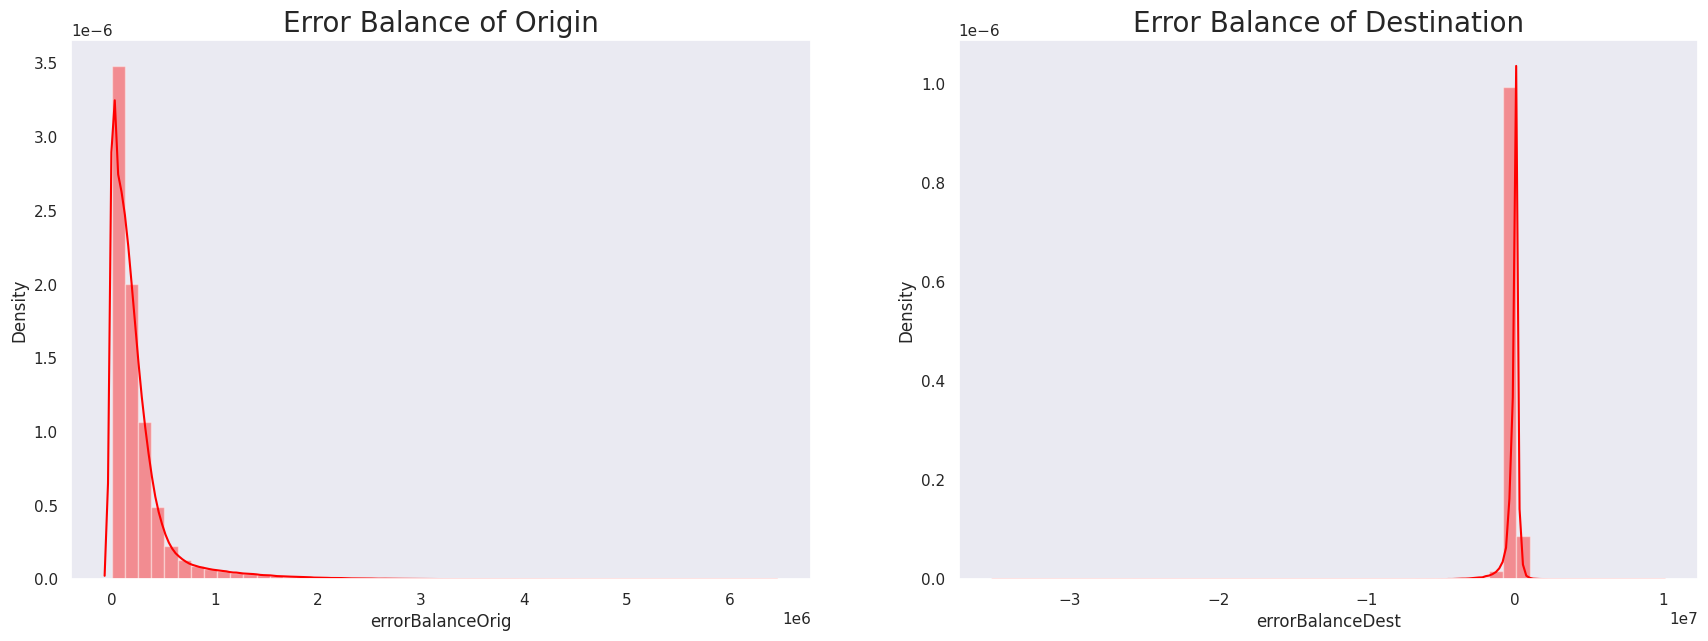

In [ ]:
# visualizing the distribution of errorbalance

# setting the size of the plot
plt.rcParams['figure.figsize'] = (21, 7)

plt.subplot(121)
sns.distplot(X['errorBalanceOrig'], color = 'red')
plt.title('Error Balance of Origin', fontsize = 20)

plt.subplot(122)
sns.distplot(X['errorBalanceDest'], color = 'red')
plt.title('Error Balance of Destination', fontsize = 20)

plt.show()

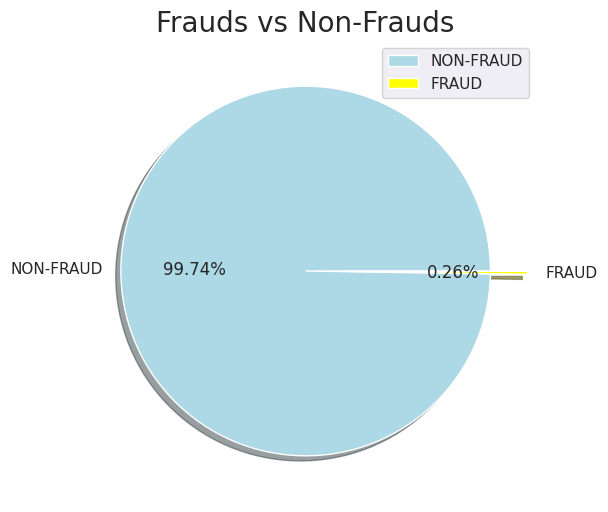

In [ ]:
import matplotlib.pyplot as plt

# Checking if 'isFraud' column exists in X
if 'isFraud' in X.columns:
    # Count the occurrences of fraud and non-fraud transactions
    fraud_counts = X['isFraud'].value_counts()

    # Ensure both classes exist to avoid indexing errors
    non_fraud = fraud_counts.get(0, 0)  # Default to 0 if key doesn't exist
    fraud = fraud_counts.get(1, 0)      # Default to 0 if key doesn't exist

    # Pie chart values
    size = [non_fraud, fraud]
    labels = ['NON-FRAUD', 'FRAUD']
    colors = ['lightblue', 'yellow']
    explode = [0, 0.2]

    # Plot the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(size, labels=labels, colors=colors, explode=explode, shadow=True, autopct='%.2f%%')
    plt.title('Frauds vs Non-Frauds', fontsize=20)
    plt.axis('off')
    plt.legend()
    plt.show()
else:
    print("Error: 'isFraud' column not found in the dataset.")


In [ ]:
X['isFraud'].value_counts()

,count
isFraud,
0.0,609567
1.0,1572


In [ ]:
# making our independent set

Y = X['isFraud']

# removing the dependent set
X = X.drop(['isFraud'], axis = 1)

# getting the shapes of x and y
print("Shape of x: ", X.shape)
print("Shape of y: ", Y.shape)

Shape of x:  (611140, 10)
Shape of y:  (611140,)


In [ ]:
X.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest
2,1,0,181.00,181.0,0.0,0.0,0.00,0.0,0.00,181.0
3,1,1,181.00,181.0,0.0,21182.0,0.00,0.0,0.00,21363.0
15,1,1,229133.94,15325.0,0.0,5083.0,51513.44,0.0,213808.94,182703.5
19,1,0,215310.30,705.0,0.0,22425.0,0.00,0.0,214605.30,237735.3
24,1,0,311685.89,10835.0,0.0,6267.0,2719172.89,0.0,300850.89,-2401220.0


OVER-SAMPLING

In [ ]:
!pip install imblearn
from imblearn.over_sampling import SMOTE

#1from imblearn.over_sampling import SMOTE

# Applying SMOTE
#smote = SMOTE()
#x_resample, y_resample = smote.fit_resample(X, Y.values.ravel())

# Getting the shapes of x and y after resampling
#print("Shape of x:", x_resample.shape)
#print("Shape of y:", y_resample.shape)

# 2 Before applying SMOTE, handle the NaN values in Y.
# Replace NaNs with the most frequent class (mode).
#from sklearn.impute import SimpleImputer
#imputer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical target
#Y_imputed = imputer.fit_transform(Y.values.reshape(-1, 1))

# Apply SMOTE using the imputed target variable
#smote = SMOTE()
#x_resample, y_resample = smote.fit_resample(X, Y_imputed.ravel())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')  # Use mode for categorical target
Y_imputed = imputer.fit_transform(Y.values.reshape(-1, 1))

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace 'mean' with other strategies if needed
X_imputed = imputer.fit_transform(X)

smote = SMOTE() # Now SMOTE is defined by importing it above
x_resample, y_resample = smote.fit_resample(X_imputed, Y_imputed.ravel())

In [ ]:
# splitting the dataset into train and tests

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_resample, y_resample, test_size = 0.2, random_state = 0)

# checking the new shapes
print("Shape of x_train: ", x_train.shape)
print("Shape of x_test: ", x_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of x_train:  (975308, 10)
Shape of x_test:  (243828, 10)
Shape of y_train:  (975308,)
Shape of y_test:  (243828,)


In [ ]:
# performing standard scaling on the data for better fit

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

Modelling using Xg-Boost Model

In [ ]:
# Using XGBOOST

import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import average_precision_score

model = XGBClassifier()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

# score of the model
auprc = average_precision_score(y_test, y_pred)
print("The Area under Precision Recall Curve Score is", auprc)

The Area under Precision Recall Curve Score is 0.9991074440035151


In [ ]:
# looking at the confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

[[121713     86]
 [    46 121983]]
